In [1]:
import os
import json
import collections
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
def plot_eval_bar_chart(eval_record, title=''):
    performances = [eval_record[criterion] for criterion in sorted(eval_record.keys())]
    criteria = list(sorted(eval_record.keys()))
    curricula = sorted(performances[0].keys(), key=lambda x: -len(x))
    
    df_list = list()
    for i, criterion in enumerate(criteria):
        for j, curriculum in enumerate(curricula):
            df_list.append(
                {
                    "curriculum": curriculum,
                    "eval criterion": criterion,
                    "success rate": performances[i][curriculum]
                }
            )
    
    df = pd.DataFrame(df_list)
    print(df.to_string())
    ax = sns.catplot(x="eval criterion", y="success rate", hue="curriculum", data=df,
                height=12, kind="bar", palette="Paired", )
    plt.title(title)

In [3]:
basic_model_dir = "/scratch/hdd001/home/ywu/ineqResultsEasy/sl_back_basic"
gen_model_dir = "/scratch/hdd001/home/ywu/ineqResultsEasy/sl_back_gen"
forward_model_dir = "/scratch/hdd001/home/ajiang/pt_models/sl_forward_basic"
atten0_model_dir = "/scratch/hdd001/home/ajiang/pt_models/sl_archi"
fakeforward_model_dir = "/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/sl_fake_forward"
model_dirs = [basic_model_dir, gen_model_dir, forward_model_dir, atten0_model_dir, fakeforward_model_dir]
eval_dir = "/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/elva"

In [4]:
all_record_train = dict()
all_record_test = dict()
for model_dir in model_dirs:
    eval_record_train = collections.defaultdict(dict)
    for time_stamp in os.listdir(model_dir):
        config = json.load(open(os.path.join(model_dir, time_stamp, "env_config.json"), "r"))
        signature = "Trained on {}, atten {}, lr {}, sd {}, hidden {}, {}".format(
            config["train_dirs"], config["atten_type"], config["lr"], 
            config["state_dim"], config["hidden"],
            "backward" if config["online_backwards"] else "forward",
        
        )
        eval_rewards = json.load(open(os.path.join(eval_dir, time_stamp, "eval_rewards.json"), "r"))
        for key, value in eval_rewards.items():
            eval_record_train[key][signature] = value["train"]
    eval_record_test = collections.defaultdict(dict)
    for time_stamp in os.listdir(model_dir):
        config = json.load(open(os.path.join(model_dir, time_stamp, "env_config.json"), "r"))
        signature = "Trained on {}".format(config["train_dirs"])
        eval_rewards = json.load(open(os.path.join(eval_dir, time_stamp, "eval_rewards.json"), "r"))
        for key, value in eval_rewards.items():
            eval_record_test[key][signature] = value["test"]
    
    all_record_train[model_dir] = eval_record_train
    all_record_test[model_dir] = eval_record_test

                                           curriculum eval criterion  success rate
0   Trained on ['k=4_l=9'], atten 1, lr 0.0003, sd...        k=1_l=1      0.918367
1   Trained on ['k=4_l=7'], atten 1, lr 0.0003, sd...        k=1_l=1      0.959184
2   Trained on ['k=4_l=9'], atten 1, lr 0.0001, sd...        k=1_l=1      0.877551
3   Trained on ['k=3_l=7'], atten 1, lr 0.0001, sd...        k=1_l=1      0.887755
4   Trained on ['k=2_l=5'], atten 1, lr 0.0003, sd...        k=1_l=1      0.948980
5   Trained on ['k=3_l=5'], atten 1, lr 0.0003, sd...        k=1_l=1      0.948980
6   Trained on ['k=3_l=7'], atten 1, lr 0.0003, sd...        k=1_l=1      0.836735
7   Trained on ['k=2_l=3'], atten 1, lr 0.0001, sd...        k=1_l=1      0.918367
8   Trained on ['k=2_l=5'], atten 1, lr 0.0001, sd...        k=1_l=1      0.877551
9   Trained on ['k=3_l=5'], atten 1, lr 0.0001, sd...        k=1_l=1      0.979592
10  Trained on ['k=2_l=3'], atten 1, lr 0.0003, sd...        k=1_l=1      0.918367
11  

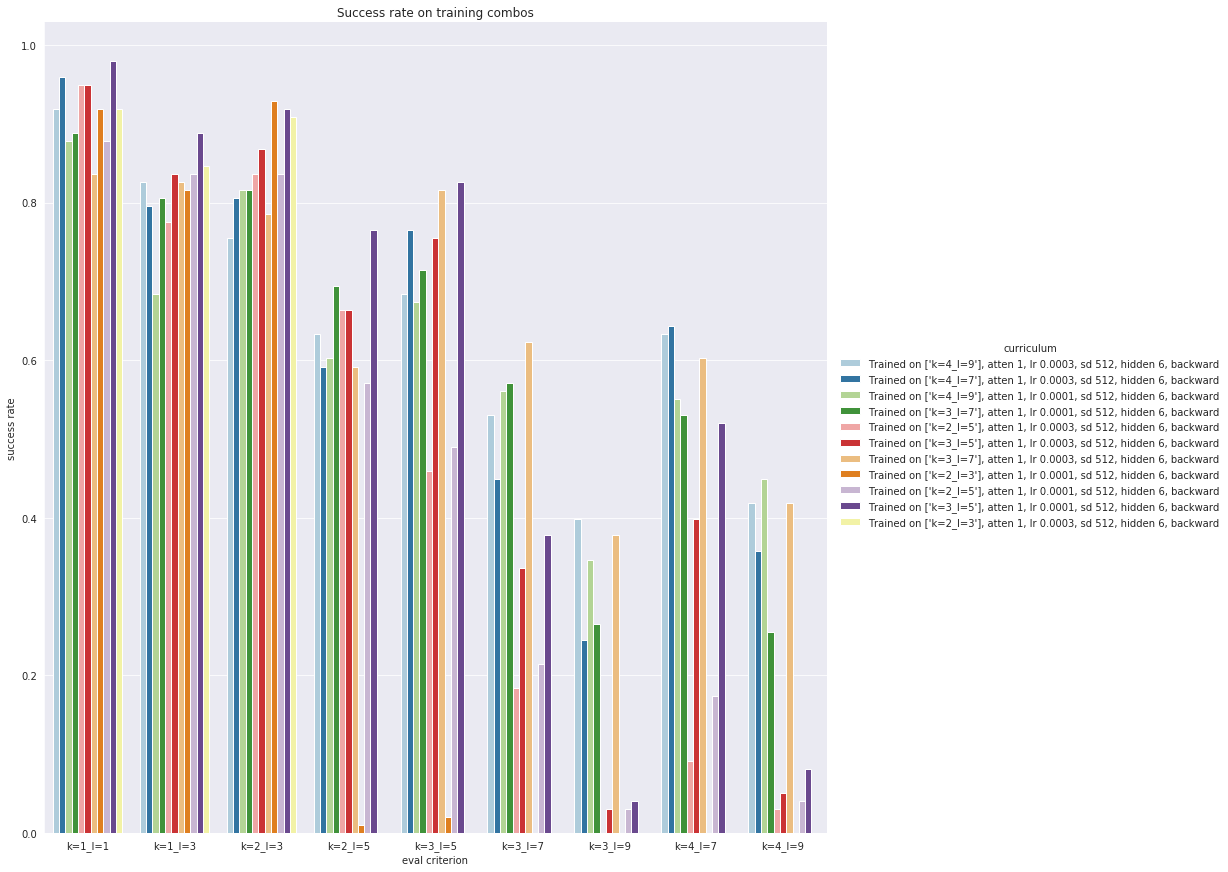

In [5]:
plot_eval_bar_chart(
    all_record_train['/scratch/hdd001/home/ywu/ineqResultsEasy/sl_back_basic'], 
    "Success rate on training combos"
)